# Pymaceuticals Inc.
---

### Analysis

1 duplicated mouse ID (g989) was found and removed from the study.  
  
Summary statistics show that mice treated with Capomulin had the second lowest average tumor volume.  
The lowest was with Ramicane. Both Capomulin and Ramicane had higher counts of total timepoints tested as well.   
  
The breakdown of sex was an almost even split,  51% male, 49% female.
In the data set of final tumor volumes for the top 4 drugs, only one outlier was found, and the drug regimen was Infubinol.  
  
A closer look at Mouse ID l509 treated with Capomulin showed a reduction in tumor volume over time.  
There is a strong positive correlation between mouse weight and average tumor volume in mice treated with Capomulin, with lower weight correlating to lower average tumor volumes.

 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study_combo = pd.merge(study_results,mouse_metadata,how="left",on="Mouse ID")
# Display the data table for preview
mouse_study_combo.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
len(mouse_study_combo["Mouse ID"].unique())

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = mouse_study_combo.groupby(["Mouse ID"])
dup_id = duplicates["Timepoint"].value_counts()[duplicates["Timepoint"].value_counts()>1]
print(dup_id)

Mouse ID  Timepoint
g989      0            2
          5            2
          10           2
          15           2
          20           2
Name: Timepoint, dtype: int64


In [4]:
dup_mouse =mouse_study_combo[mouse_study_combo.duplicated(["Mouse ID","Timepoint"])]
print(dup_mouse["Mouse ID"])

137     g989
360     g989
681     g989
869     g989
1111    g989
Name: Mouse ID, dtype: object


In [5]:
# Optional: Get all the data for the duplicate mouse ID.
g989 = mouse_study_combo.loc[mouse_study_combo["Mouse ID"]=="g989"]
g989

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_study_clean = mouse_study_combo.loc[mouse_study_combo["Mouse ID"] != "g989"]
mouse_study_clean.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [7]:
# Checking the number of mice in the clean DataFrame.
len(mouse_study_clean["Mouse ID"].unique())

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
grouped_regimen_df = mouse_study_clean.groupby(["Drug Regimen"])
mean = grouped_regimen_df["Tumor Volume (mm3)"].mean()
median = grouped_regimen_df["Tumor Volume (mm3)"].median()
variance = grouped_regimen_df["Tumor Volume (mm3)"].var()
stdv = grouped_regimen_df["Tumor Volume (mm3)"].std()
stderr = grouped_regimen_df["Tumor Volume (mm3)"].sem()
regimen_stats = pd.DataFrame({"Mean Tumor Volume":mean,"Median Tumor Volume":median,
            "Tumor Volume Variance": variance, "Tumor Volume Std. Dev.":stdv, "Tumor Volume Std. Err.":stderr})
regimen_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
aggregate_stats = mouse_study_clean.groupby(["Drug Regimen"]).agg({"Tumor Volume (mm3)":['mean','median','var','std','sem']})
aggregate_stats

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<AxesSubplot:xlabel='Drug Regimen', ylabel='Number of Mice Tested'>

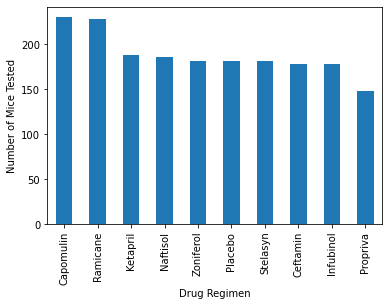

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
drug_regimen_plot = mouse_study_clean.groupby(["Drug Regimen"]).count()["Timepoint"]
drug_regimen_plot = drug_regimen_plot.sort_values(ascending=False)
drug_regimen_plot.plot(kind='bar', xlabel="Drug Regimen", ylabel="Number of Mice Tested")


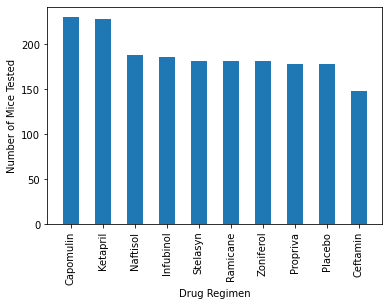

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_axis = mouse_study_clean["Drug Regimen"].unique()
y_axis = mouse_study_clean["Drug Regimen"].value_counts()
plt.bar(x_axis,y_axis, width=.5)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.xticks(rotation=90)
plt.show()


<AxesSubplot:ylabel='Sex'>

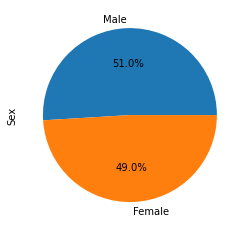

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_count = mouse_study_clean.groupby(["Sex"]).count()["Mouse ID"]
gender_totals = gender_count.sort_values(ascending=False)
gender_totals.plot(kind='pie', autopct='%1.1f%%', ylabel="Sex")


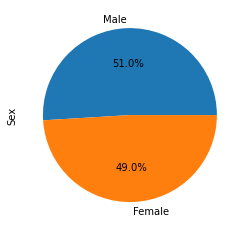

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Male", "Female"]
sex_count = mouse_study_clean["Sex"].value_counts()
male_count = sex_count[0]
female_count = sex_count[1]
size = [male_count,female_count]
plt.pie(size,labels=labels, autopct='%1.1f%%')
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
time_table = mouse_study_clean[["Mouse ID","Timepoint"]]
last_time = time_table.groupby(["Mouse ID"]).max()["Timepoint"]

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_vol = pd.merge(last_time,mouse_study_clean, how="left", on=["Mouse ID","Timepoint"])
top_four_tumor_vol = final_tumor_vol.loc[(final_tumor_vol["Drug Regimen"] == "Capomulin") | (final_tumor_vol["Drug Regimen"] =="Ramicane") 
                | (final_tumor_vol["Drug Regimen"] == "Infubinol") | (final_tumor_vol["Drug Regimen"] == "Ceftamin"),:]
top_four_tumor_vol

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
3,a275,45,62.999356,3,Ceftamin,Female,20,28
6,a411,45,38.407618,1,Ramicane,Male,3,22
7,a444,45,43.047543,0,Ramicane,Female,10,25
...,...,...,...,...,...,...,...,...
238,y769,45,68.594745,4,Ceftamin,Female,6,27
239,y793,45,31.896238,2,Capomulin,Male,17,17
240,y865,45,64.729837,3,Ceftamin,Male,23,26
244,z578,45,30.638696,0,Ramicane,Male,11,16


In [16]:
# Put treatments into a list for for loop (and later for plot labels)
top_four_drug = ["Capomulin","Ramicane","Infubinol","Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_totals= []

for drug in top_four_drug:
    cur_tumor_vols= [top_four_tumor_vol.iloc[x,2] for x in range(0,len(top_four_tumor_vol)-1) if top_four_tumor_vol.iloc[x,4]==drug]
    tumor_vol_totals.append(cur_tumor_vols)

print(tumor_vol_totals)  

[[38.98287774, 38.93963263, 30.48598484, 37.07402422, 40.1592203, 47.68596303, 37.31184577, 38.1251644, 38.75326548, 41.48300765, 38.84687569, 28.43096411, 33.32909778, 46.53920617, 32.37735684, 41.58152074, 23.34359787, 40.72857787, 34.45529799, 31.02392294, 40.65812366, 39.95234669, 36.04104736, 28.48403281, 31.8962384], [38.4076183, 43.0475426, 38.81036633, 32.97852192, 38.34200823, 33.39765251, 37.31123552, 40.65900627, 29.12847181, 33.56240217, 36.37451039, 31.56046955, 36.13485243, 22.05012627, 30.56462509, 31.09533505, 45.22086888, 36.56165229, 37.22565033, 43.41938077, 30.27623175, 40.66771292, 43.16637266, 44.18345092, 30.63869575], [67.97341878, 65.52574285, 57.03186187, 66.08306589, 72.2267309, 36.3213458, 60.96971133, 62.43540402, 60.91876652, 67.28962147, 66.19691151, 62.11727887, 47.01036401, 60.16518046, 55.62942846, 45.69933088, 54.65654872, 55.65068132, 46.25011212, 54.04860769, 51.54243058, 50.00513807, 58.26844248, 67.68556862], [62.99935619, 45.0, 56.05774909, 55.74

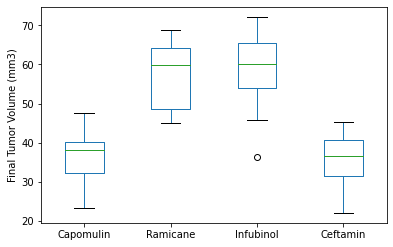

In [19]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
#fig, ax = plt.subplots()
box_plot = top_four_tumor_vol.boxplot('Tumor Volume (mm3)',by='Drug Regimen', grid=False)
plt.title('')
plt.suptitle('')
box_plot.set_ylabel("Final Tumor Volume (mm3)")
box_plot.set_xticklabels(top_four_drug)
box_plot.set_xlabel("")
plt.show()

## Line and Scatter Plots

<AxesSubplot:title={'center':'Capomulin treatment of mouse l509'}, xlabel='Timepoint'>

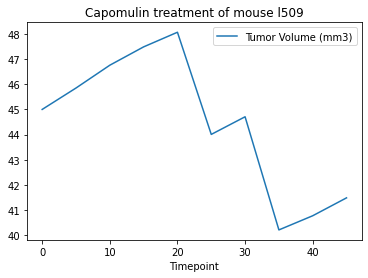

In [22]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouse_l509 = mouse_study_clean.loc[mouse_study_clean['Mouse ID'] == "l509"]
mouse_l509.plot(kind='line', x= 'Timepoint', y ='Tumor Volume (mm3)', title= 'Capomulin treatment of mouse l509')


<AxesSubplot:xlabel='Weight (g)', ylabel='Average Tumor Volume (mm3)'>

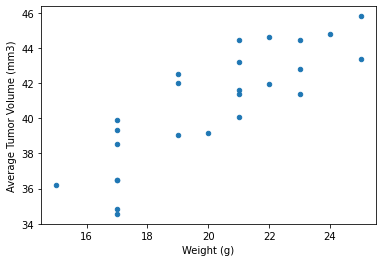

In [25]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_regimen = mouse_study_clean.loc[mouse_study_clean['Drug Regimen']=='Capomulin']
capomulin_grouped = capomulin_regimen.groupby(['Mouse ID']).mean()[['Tumor Volume (mm3)', 'Weight (g)']]
capomulin_grouped.plot(kind='scatter', x= 'Weight (g)', y='Tumor Volume (mm3)', ylabel= 'Average Tumor Volume (mm3)')

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


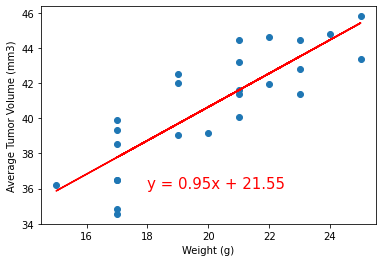

In [32]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_values = capomulin_grouped['Weight (g)']
y_values = capomulin_grouped['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print (f'The correlation between mouse weight and the average tumor volume is {round(rvalue,2)}')
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(18,36),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

